In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline 

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

C:\Users\Mehmet\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\Mehmet'

In [5]:
lc = pd.read_csv("Lending_Club_Loan_Status_2017Q2.csv")

In [6]:
lc.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,delinq_2yrs,mths_since_last_delinq,revol_bal,total_rec_late_fee,recoveries,application_type,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt
0,112119128,25000,60 months,15.05%,595.41,C,C4,Supervisor,10+ years,RENT,...,0,NaN,26947,0.0,0.0,Individual,0,26947,0,0
1,112436920,26000,36 months,9.93%,838.10,B,B2,Dealer,7 years,OWN,...,0,NaN,6857,0.0,0.0,Individual,0,41031,0,0
2,112390231,20000,36 months,9.44%,640.10,B,B1,Executive Assistant,< 1 year,RENT,...,2,16.0,20589,0.0,0.0,Individual,0,37895,0,0
3,112156817,10000,36 months,7.21%,309.74,A,A3,Regional Practice Director,7 years,OWN,...,0,44.0,18633,0.0,0.0,Individual,0,278599,0,0
4,112438887,15000,36 months,7.97%,469.84,A,A5,Senior Software Engineer,3 years,MORTGAGE,...,0,NaN,14460,0.0,0.0,Individual,0,279860,0,0


In [7]:
type(lc)

pandas.core.frame.DataFrame

In [8]:
lc.drop("id", axis = 1, inplace= True)

In [9]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105451 entries, 0 to 105450
Data columns (total 25 columns):
loan_amnt                   105451 non-null int64
term                        105451 non-null object
int_rate                    105451 non-null object
installment                 105451 non-null float64
grade                       105451 non-null object
sub_grade                   105451 non-null object
emp_title                   98669 non-null object
emp_length                  105451 non-null object
home_ownership              105451 non-null object
annual_inc                  105451 non-null float64
issue_d                     105451 non-null object
loan_status                 105451 non-null object
purpose                     105451 non-null object
title                       105451 non-null object
dti                         105376 non-null float64
delinq_2yrs                 105451 non-null int64
mths_since_last_delinq      54332 non-null float64
revol_bal             

In [10]:
lc.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,revol_bal,total_rec_late_fee,recoveries,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt
count,105451.000000,105451.000000,1.054510e+05,105376.000000,105451.000000,54332.00000,1.054510e+05,105451.000000,105451.000000,105451.000000,1.054510e+05,105451.000000,105451.000000
mean,14589.070516,436.796015,8.045197e+04,18.987276,0.356052,33.28613,1.659603e+04,0.304059,0.254452,238.743160,1.476414e+05,0.009189,16.598382
std,9478.834204,280.181663,6.822064e+04,14.145490,0.962047,21.91821,2.296594e+04,3.572760,27.604537,1965.459727,1.647652e+05,0.105249,744.727563
min,1000.000000,30.120000,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7000.000000,232.640000,4.800000e+04,12.230000,0.000000,15.00000,5.887000e+03,0.000000,0.000000,0.000000,2.996700e+04,0.000000,0.000000
50%,12000.000000,361.380000,6.800000e+04,18.120000,0.000000,30.00000,1.117000e+04,0.000000,0.000000,0.000000,8.366000e+04,0.000000,0.000000
75%,20000.000000,584.370000,9.700000e+04,24.580000,0.000000,49.00000,1.993350e+04,0.000000,0.000000,0.000000,2.213720e+05,0.000000,0.000000
max,40000.000000,1719.830000,8.900000e+06,999.000000,42.000000,161.00000,1.039013e+06,165.660000,4693.930000,262740.000000,3.566850e+06,4.000000,65000.000000


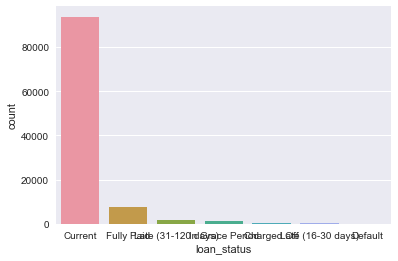

In [11]:
sns.countplot(x = "loan_status", data = lc)

"Current" in loan status is ongoing loan however I want to look at historical data so I delete "current" loan in rows.

In [12]:
lc.drop(lc[lc["loan_status"] == "Current"].index, inplace = True)

In [13]:
lc["loan_status"].unique()

array(['Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default'], dtype=object)

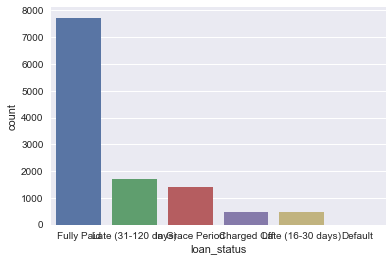

In [14]:
sns.countplot(x = "loan_status", data = lc)

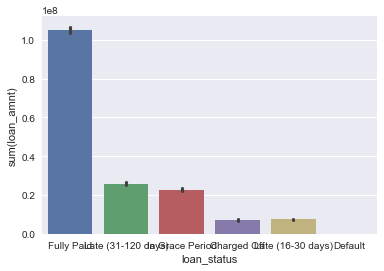

In [15]:
sns.barplot(x = "loan_status", y = "loan_amnt", data = lc, estimator = np.sum)

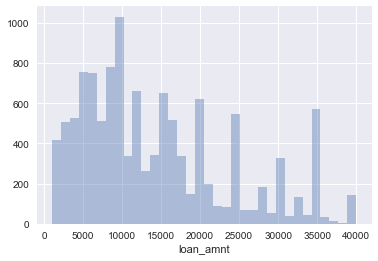

In [16]:
sns.distplot(lc["loan_amnt"], kde = False)

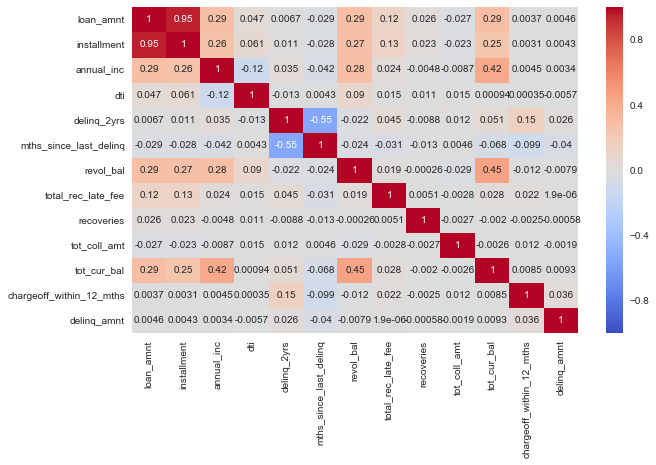

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(lc.corr(), annot= True, cmap= "coolwarm")

Original data set has "dti" (debt to income ratio) which takes into account all debt of borrower including credit cards, mortgage and other loans. However, we can't see detail of all debt. So, I want to create a risk index as installment divided by annual income, which is also necessary for the purpose of the assignment to define "function" and use "apply". Then, I remove dti column.
Since some values for annual income are zero, I remove them.

In [18]:
lc.drop(lc[lc["annual_inc"] == 0].index, inplace = True)
lc.drop("dti", axis = 1, inplace = True)

In [19]:
def risk(x, y):
    return (x*12)/y

In [20]:
lc["risk_index"] = lc.apply(lambda col: risk(col["installment"], col["annual_inc"]), axis = 1)

In [21]:
lc.describe()

,loan_amnt,installment,annual_inc,delinq_2yrs,mths_since_last_delinq,revol_bal,total_rec_late_fee,recoveries,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,risk_index
count,11758.00000,11758.000000,1.175800e+04,11758.000000,6147.000000,11758.000000,11758.000000,11758.000000,11758.000000,1.175800e+04,11758.000000,11758.000000,11758.000000
mean,14315.21092,446.733038,8.213368e+04,0.356693,33.501708,16269.973890,1.284451,2.282037,227.848188,1.591896e+05,0.009866,15.043205,0.079298
std,9589.54739,300.633617,7.821017e+04,0.947819,22.038139,23877.589551,7.614694,82.643449,2291.374088,1.752500e+05,0.108676,716.045828,0.160950
min,1000.00000,30.120000,6.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000797
25%,6600.00000,222.990000,5.000000e+04,0.000000,15.000000,5437.250000,0.000000,0.000000,0.000000,3.329325e+04,0.000000,0.000000,0.038955
50%,12000.00000,361.620000,7.000000e+04,0.000000,30.000000,10766.500000,0.000000,0.000000,0.000000,9.716850e+04,0.000000,0.000000,0.065065
75%,20000.00000,607.337500,9.848100e+04,0.000000,49.000000,19570.250000,0.000000,0.000000,0.000000,2.377418e+05,0.000000,0.000000,0.100891
max,40000.00000,1546.520000,5.616890e+06,14.000000,158.000000,606088.000000,165.660000,4693.930000,199433.000000,3.566850e+06,3.000000,65000.000000,15.393480


In [22]:
lc["loan_status"].unique()

array(['Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default'], dtype=object)

In [23]:
sixty_months = pd.get_dummies(lc["term"], drop_first= True)

In [24]:
home_ownership = pd.get_dummies(lc["home_ownership"], drop_first= True)

In [25]:
lc.drop(["int_rate", "installment", "grade", "sub_grade", "issue_d", "purpose", "title", "emp_title", "emp_length", "annual_inc","mths_since_last_delinq", "application_type", "tot_coll_amt", "chargeoff_within_12_mths"], axis = 1, inplace= True)

In [26]:
lc["sixty_months"] = sixty_months

In [27]:
home_ownership = home_ownership.drop("MORTGAGE", axis = 1)

In [28]:
lc["home_ownership"] = home_ownership

In [29]:
lc.drop(["term"], axis = 1, inplace= True)


In [30]:
y = np.where(lc['loan_status']=='Charged Off', 1, 0)

In [31]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [32]:
lc.drop("loan_status", inplace= True, axis = 1)

In [33]:
X = lc
X.head()

,loan_amnt,home_ownership,delinq_2yrs,revol_bal,total_rec_late_fee,recoveries,tot_cur_bal,delinq_amnt,risk_index,sixty_months
9,7500,0,0,23348,0.0,0.0,276461,0,0.025395,0
33,11575,1,0,8550,0.0,0.0,442731,0,0.028177,0
35,7200,0,0,3560,0.0,0.0,5588,0,0.068568,0
90,40000,0,1,23493,0.0,0.0,655618,0,0.061450,0
98,5000,0,0,2110,0.0,0.0,6341,0,0.055656,0


In [34]:
from sklearn.cross_validation import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3401
          1       1.00      0.03      0.06       127

avg / total       0.97      0.97      0.95      3528

[[3401    0]
 [ 123    4]]
